In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit
import joblib

In [34]:
df=pd.read_csv('telco_customer_preprocessed_mc.csv')

In [35]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,TotalCharges_scaled,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,InternetService_FE,OnlineSecurity_FE,OnlineBackup_FE,DeviceProtection_FE,TechSupport_FE,StreamingTV_FE,StreamingMovies_FE,Contract_FE,PaperlessBilling_FE,PaymentMethod_FE
0,0,1,29.85,0,0.001275,1,0,0,1,1,...,0.343746,0.496663,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794
1,0,34,56.95,0,0.215867,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.493114,0.398978,0.395428,0.209144,0.407781,0.228880
2,0,2,53.85,1,0.010310,0,1,1,0,1,...,0.343746,0.286668,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.228880
3,0,45,42.30,0,0.210241,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.290217,0.398978,0.395428,0.209144,0.407781,0.219225
4,0,2,70.70,1,0.015330,1,0,1,0,1,...,0.439585,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794


Selected Features

InternetService_FE,
TotalCharges_scaled,
StreamingTV_FE,
StreamingMovies_FE,
DeviceProtection_FE,
OnlineSecurity_FE,
OnlineBackup_FE,
TechSupport_FE,
MultipleLines_FE,
PhoneService_FE,
tenure,
PaymentMethod_FE,
Contract_FE,
PaperlessBilling_FE,
Churn,
SeniorCitizen,
Partner_No,    
Partner_Yes

In [36]:
feature = df[['InternetService_FE', 'StreamingTV_FE', 'StreamingMovies_FE', 'DeviceProtection_FE', 'OnlineSecurity_FE', 'OnlineBackup_FE', 'TechSupport_FE', 'MultipleLines_FE', 'PhoneService_FE', 'tenure', 'PaymentMethod_FE', 'Contract_FE', 'PaperlessBilling_FE', 'Churn', 'SeniorCitizen', 'Partner_No', 'Partner_Yes']]
target = df['MonthlyCharges']

Train Test Split :- Split the Data for Training and Test

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
n = len(y_test)
p = X_test.shape[1]
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")
print(f"Adjusted R2: {adj_r2:.4f}")

MSE: 43.9830
RMSE: 6.6320
MAE: 5.6379
R2: 0.9514
Adjusted R2: 0.9508


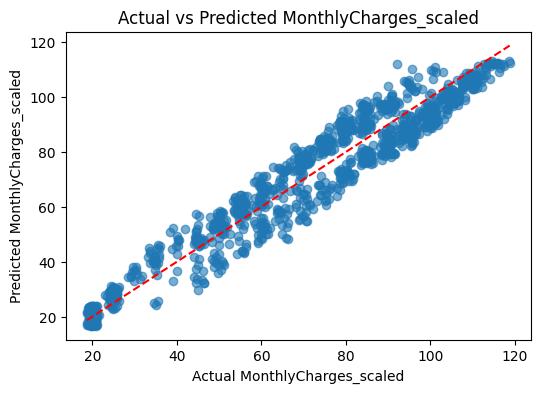

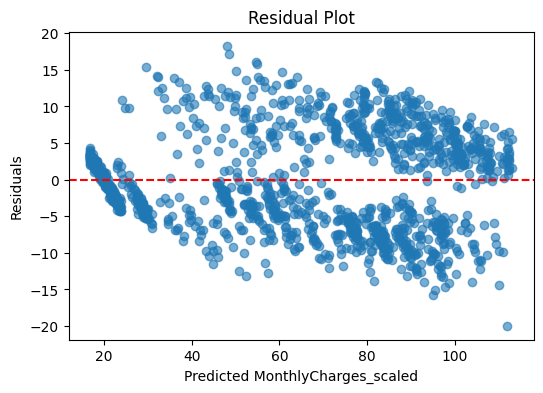

In [41]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual MonthlyCharges_scaled")
plt.ylabel("Predicted MonthlyCharges_scaled")
plt.title("Actual vs Predicted MonthlyCharges_scaled")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MonthlyCharges_scaled")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

A residual is the difference between the actual value and the predicted value from a regression model:

residual = actual value - predicted value

If the residual is close to 0, the prediction is accurate.

If the residual is large (positive or negative), the prediction is less accurate.

############################################################################################

Check Training and Test Accuracy

In [42]:
# Training and test accuracy (R2) for Linear Regression

# Training predictions and metrics
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

print("Training set metrics:")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R2: {train_r2:.4f}")
print(f"  Adjusted R2: {train_adj_r2:.4f}")

# Test predictions and metrics (already computed)
print("\nTest set metrics:")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R2: {r2:.4f}")
print(f"  Adjusted R2: {adj_r2:.4f}")

Training set metrics:
  MSE: 44.1325
  RMSE: 6.6432
  MAE: 5.5982
  R2: 0.9512
  Adjusted R2: 0.9511

Test set metrics:
  MSE: 43.9830
  RMSE: 6.6320
  MAE: 5.6379
  R2: 0.9514
  Adjusted R2: 0.9508


Model is Generalized Well

###################################################################################################

So Now Check ------- Cross Validation ----------- to avoid Data Leakage

##############################################################################################

In [43]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
model = LinearRegression()

# Cross-validated scores
mse_scores = -cross_val_score(model, feature, target, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
mae_scores = -cross_val_score(model, feature, target, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, feature, target, cv=kf, scoring='r2')

print("Cross-Validation Results (5-Fold):")
print(f"  MSE:  {mse_scores.mean():.4f} (+/- {mse_scores.std():.4f})")
print(f"  RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
print(f"  MAE:  {mae_scores.mean():.4f} (+/- {mae_scores.std():.4f})")
print(f"  R2:   {r2_scores.mean():.4f} (+/- {r2_scores.std():.4f})")

Cross-Validation Results (5-Fold):
  MSE:  44.3898 (+/- 1.3644)
  RMSE: 6.6618 (+/- 0.1016)
  MAE:  5.6241 (+/- 0.1273)
  R2:   0.9508 (+/- 0.0027)


No Data Leakage Happens

In [44]:
###################################################################################################

Now Save the model

In [45]:
import joblib

# Save the trained Linear Regression model to a file
joblib.dump(model, "models/linear_regression_monthlycharges_scaled.pkl")
print("Model saved as linear_regression_monthlycharges_scaled.pkl")

Model saved as linear_regression_monthlycharges_scaled.pkl


In [46]:
from sklearn.linear_model import LinearRegression
import joblib

model = LinearRegression()
model.fit(X_train, y_train)  # <-- This is required!
joblib.dump(model, "models/linear_regression_monthlycharges_scaled_again.pkl")

['models/linear_regression_monthlycharges_scaled_again.pkl']

##################################################################################################

Prediction Not Accurate so now am try Random Forest Algorithm its multiple decision tree its does't manipulate a wrong data create a wrong tree

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv('telco_customer_preprocessed_mc.csv')

# Select features and target
feature_cols = [
    'InternetService_FE', 'StreamingTV_FE', 'StreamingMovies_FE',
    'DeviceProtection_FE', 'OnlineSecurity_FE', 'OnlineBackup_FE', 'TechSupport_FE',
    'MultipleLines_FE', 'PhoneService_FE', 'tenure', 'PaymentMethod_FE', 'Contract_FE',
    'PaperlessBilling_FE', 'Churn', 'SeniorCitizen', 'Partner_No', 'Partner_Yes'
]
X = df[feature_cols]
y = df['MonthlyCharges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics for training set
n_train = len(y_train)
p = X_train.shape[1]
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)

# Metrics for test set
n_test = len(y_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print("Training set metrics:")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R2: {train_r2:.4f}")
print(f"  Adjusted R2: {train_adj_r2:.4f}")

print("\nTest set metrics:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R2: {test_r2:.4f}")
print(f"  Adjusted R2: {test_adj_r2:.4f}")

Training set metrics:
  MSE: 0.2932
  RMSE: 0.5414
  MAE: 0.3971
  R2: 0.9997
  Adjusted R2: 0.9997

Test set metrics:
  MSE: 1.6319
  RMSE: 1.2775
  MAE: 0.9431
  R2: 0.9982
  Adjusted R2: 0.9982


###################################################################################

Model is generalized weel

but done ----- Hyperparameter Tuning ----- for this

Hyperparameter Tuning for Gridsearch CV

########################################################################################

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated score (negative MSE):", grid_search.best_score_)

# Use the best estimator for predictions
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)

# Evaluate on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
n_test = len(y_test)
p = X_test.shape[1]
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print("\nTest set metrics with best model:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R2: {test_r2:.4f}")
print(f"  Adjusted R2: {test_adj_r2:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated score (negative MSE): -1.8265007359708882

Test set metrics with best model:
  MSE: 1.5045
  RMSE: 1.2266
  MAE: 0.8925
  R2: 0.9983
  Adjusted R2: 0.9983


Save this model

In [52]:
import joblib

# Save the best Random Forest model from GridSearchCV
joblib.dump(best_rf, "models/best_random_forest_monthlycharges.pkl")
print("Model saved as models/best_random_forest_monthlycharges.pkl")

Model saved as models/best_random_forest_monthlycharges.pkl
